<a href="https://colab.research.google.com/github/Benyormin/fineTuneBert/blob/main/fineTuningBert_CR_k-Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT text classification on SST2 dataset

In this notebook, we will use Hugging face [Transformers](https://huggingface.co/transformers/) to build BERT model on text classification task with [Pytorch](https://pytorch.org).

Notes: this notebook is entirely run on [Google colab](https://colab.research.google.com/) with GPU. If you start a new notebook, you need to choose "Runtime"->"Change runtime type" ->"GPU" at the begining.

### Introduction of BERT



BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art language model developed by Google AI. It is a deep learning model that can learn to represent the meaning of words and phrases in a text. BERT is based on the Transformer architecture, which is a neural network architecture that is particularly well-suited for natural language processing tasks

### Introduction of huggingface or Transformers

Hugging face is a company which invented a pacakge called [Transformers](https://github.com/huggingface/transformers). It provides state-of-the-art general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet, CTRL...) for Natural Language Understanding (NLU) and Natural Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between TensorFlow 2.0 and PyTorch.

# Install dependencies

In [1]:
!pip install datasets transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

#parameters

you can change parameter here

In [2]:
FOLDS = 10 #@param {"type": "integer"}
SEED = 0  #@param {"type": "integer"}
MAX_LENGTH = 256 #@param {"type": "integer"}
BATCH_SIZE = 32 #@param {"type": "integer"}
learning_rate = 1e-5 #@param {"type": "number"}
num_epochs = 6 #@param {"type": "integer"}

# print 3 times befor ending epoch
printFreq = 24  #@param {"type": "integer"}
SAVE_DIR = "/content/drive/MyDrive/nlp/datasets/CR_DATASET" #@param{"type": "string"}
zip_path = '/content/drive/MyDrive/nlp/datasets/CR_DATASET/CR_DATASET.zip' #@param{"type": "string"}
folder_path = '/content/content/drive/MyDrive/nlp/datasets/CR_DATASET/' #@param{"type": "string"}

mount to google drive for saving purposes

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load Dataset

The Customer Reviews (CR) dataset is a widely used benchmark dataset in the field of natural language processing (NLP) and sentiment analysis. It consists of a large collection of customer reviews from various domains such as electronics, movies, books, and more. Each review in the dataset is accompanied by a corresponding sentiment label indicating whether the sentiment expressed in the review is positive, negative, or neutral. The CR dataset serves as a valuable resource for researchers and practitioners to develop and evaluate sentiment analysis models, assess the effectiveness of different NLP techniques, and explore the nuances of sentiment expression in real-world customer feedback. Its diverse range of domains and sentiments make it an ideal choice for training and testing sentiment analysis algorithms across different contexts and applications.

In [4]:
import transformers
from datasets import load_dataset, concatenate_datasets, load_from_disk

In [5]:
dataset = load_dataset("SetFit/CR")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3394
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 376
    })
})

In [7]:
from datasets.dataset_dict import DatasetDict
crDataset = DatasetDict({"train": concatenate_datasets([dataset['train'], dataset['test']])})
crDataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3770
    })
})

In [8]:
len(crDataset['train'])

3770

## Cross validation

perform k-fold cross validation on CR dataset

split train dev test : 80/10/10 %

In [16]:
import os
def cross_validation (FOLDS, SEED):
  '''
  perform a k-fold cross validation on CR dataset and save it to the save_dir
  '''
  #first applying shuffle
  crDataset['train'] = crDataset['train'].shuffle(seed= SEED)

  for fold in range(1, FOLDS+1):
    num_samples = len(crDataset['train'])
    #divide samples to FOLDS part and every iteration select one part
    start_index = int((fold-1)*(num_samples/FOLDS))
    end_index = int((fold*(num_samples/FOLDS)))

    testDataset = crDataset['train'].select(range(start_index, end_index))
    trainDataset = concatenate_datasets([crDataset['train'].select(range(0, start_index)), crDataset['train'].select(range(end_index, num_samples-1))])
    trainDataset = trainDataset.shuffle(seed=SEED)
    #split trian/ dev
    #90%, 10%
    train_dataset, validation_dataset= trainDataset.train_test_split(test_size=0.1).values()
    #put everything in datasetDict object
    dataset = DatasetDict({"train": train_dataset, "validation": validation_dataset, "test":testDataset})
    #save each dataset fold inorder to access them later

    dataset.save_to_disk(os.path.join(SAVE_DIR, f"fold-{fold}-CR"))

cross_validation(FOLDS, SEED)




Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3053 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/377 [00:00<?, ? examples/s]

In [20]:
# zip file
!zip -r '/content/drive/MyDrive/nlp/datasets/CR_DATASET/CR_DATASET.zip' '/content/drive/MyDrive/nlp/datasets/CR_DATASET'

  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/ (stored 0%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/ (stored 0%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/dataset_dict.json (deflated 5%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/train/ (stored 0%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/train/data-00000-of-00001.arrow (deflated 65%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/train/state.json (deflated 41%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/train/dataset_info.json (deflated 65%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/validation/ (stored 0%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/validation/data-00000-of-00001.arrow (deflated 63%)
  adding: content/drive/MyDrive/nlp/datasets/CR_DATASET/fold-1-CR/validation/state.json (deflated 41%)
  adding: content/drive/MyDrive/nlp/datase

## Load each Fold


**Note:** if you want to run this notebook you should run cross validation once and run this section k-times and finetune model base on each fold and eventualy compute average accuracy and F1-score

using two function we first unzip the k-fold cross validation dataset and then load each fold using 'load_dataset_fold' function



In [9]:
#load dataset
import zipfile
import os
from datasets import load_from_disk
import os

def unzip_file(zip_path, extract_path):
    """
    Unzip a zip file to the specified directory.

    Args:
    - zip_path (str): The path to the zip file.
    - extract_path (str): The directory where the contents of the zip file will be extracted.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

def load_dataset_fold(num_fold, dir=folder_path):

  # Load each fold separately for training
  if(num_fold <=0 or num_fold>10):
    return "it's 10 fold cross-validation please enter valid number in range 1-10!"
  dataset = load_from_disk(os.path.join(dir, f"fold-{num_fold}-CR"))
  return dataset



unzip_file(zip_path, '')


In [220]:
cFold = 1 #@param{"type": "integer"}

In [221]:

dataset = load_dataset_fold(cFold)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3053
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 340
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 377
    })
})

#Preprocess

The next step is to load a BERT tokenizer to preprocess the `text` field

In [222]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [223]:
def tokenize_function(examples):
  '''
  Preprocesses the input examples for the NLP model.

    Args:
        examples (List[Dict]): A list of input examples, where each example is a dictionary
            containing the following keys:
                - "sentence": The text of the example.

    Returns:
        Dict: A dictionary containing the preprocessed examples.
  '''
  return tokenizer(examples["text"],  truncation=True, max_length= MAX_LENGTH )

train_tokenized = dataset['train'].map(tokenize_function, batched = True)
valid_tokenized = dataset['validation'].map(tokenize_function, batched = True)
test_tokenized = dataset['test'].map(tokenize_function, batched = True)


Map:   0%|          | 0/3053 [00:00<?, ? examples/s]

Map:   0%|          | 0/340 [00:00<?, ? examples/s]

Map:   0%|          | 0/377 [00:00<?, ? examples/s]

In [224]:
train_tokenized.set_format('torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
valid_tokenized.set_format('torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
test_tokenized.set_format('torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
train_tokenized, valid_tokenized, test_tokenized

(Dataset({
     features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 3053
 }),
 Dataset({
     features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 340
 }),
 Dataset({
     features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 377
 }))

# Dataloader and Dynamic padding

Dynamic padding means the samples in a batch should all be padded to a length of the maximum length of samples in that batch . Without dynamic padding, all of the samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept

In [225]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

data_collator = DataCollatorWithPadding(tokenizer= tokenizer)

train_dataloader = DataLoader(train_tokenized, batch_size= BATCH_SIZE, shuffle=True, collate_fn=data_collator)
valid_dataloader = DataLoader(valid_tokenized, batch_size= BATCH_SIZE, shuffle= True, collate_fn= data_collator)
test_dataloader = DataLoader(test_tokenized, batch_size= BATCH_SIZE, shuffle=True, collate_fn= data_collator)

#Model

in this notebook we are going to use [BertModel](https://https://huggingface.co/google-bert/bert-base-uncased)

Model description: BERT is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labeling them in any way

## Loss function


Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.


Cross-Entropy Loss=

$$ \text{CrossEntropyLoss} = -\frac{1}{N} \sum_{i=1}^{N} \log\left(\frac{e^{x_{\text{predicted},i}}}{\sum_{j=1}^{C} e^{x_{\text{predicted},j}}}\right)$$


- N is the batch size.

- C is the number of classes.

- x predicted,i is the unnormalized predicted score for class i (logit).
- The sum over j in the denominator is the sum of exponentiated predicted scores for all classes in the batch.
- The logarithm calculates the log probability of the predicted class.

In [226]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel

class Bert(nn.Module):
  '''
  bert model for binary text classification
  '''
  def __init__(self, name ="bert-base-uncased", num_classes =2):
    super(Bert, self).__init__()
    self.bert = BertModel.from_pretrained(name)
    #add drop out and classifier layers
    self.dp = nn.Dropout(0.1)
    self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes) #768,2
    self.criterion = nn.CrossEntropyLoss()

  def forward(self, input_ids, token_type_ids, attention_mask, labels=None):
    outputs = self.bert(input_ids= input_ids, attention_mask= attention_mask, token_type_ids= token_type_ids)
    CLS = outputs[0][:, 0, :].view(-1,768)
    output = self.dp(CLS)
    logits = self.classifier(output)
    loss = self.criterion(logits, labels)
    return {
        'loss':loss,
        'logits':logits
    }


move model to GPU if its available

In [227]:
model = Bert()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Bert(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)

#optimizer

The Adam optimizer, also known as Adaptive Moment Estimation, is a stochastic gradient descent optimization algorithm that is commonly used for training deep learning models.

In [228]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=learning_rate)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#Learning rate Scheduler


The purpose of using a learning rate scheduler is to improve the training process and optimize the model's performance.
A learning rate scheduler allows you to dynamically adjust the learning rate based on certain conditions or predefined schedules. This can help the model converge faster and achieve better accuracy.

In [229]:
from transformers import get_scheduler

num_training_steps = num_epochs*len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

#Accelerator

Accelerate is a high-level library that simplifies and accelerates distributed training and evaluation for PyTorch and Transformers models. It provides a user-friendly API that abstracts away the complexities of distributed training, making it easier to train models on multiple GPUs or TPUs.

In [230]:
from accelerate import Accelerator
accelerator = Accelerator()

train_dataloader, valid_dataloader, test_dataloader, model, optimizer = accelerator.prepare(train_dataloader, valid_dataloader, test_dataloader, model, optimizer)

#Training

In [231]:
num_training_steps

576

In [232]:
len(train_dataloader)*32, len(train_tokenized)


(3072, 3053)

In [233]:
def train_epoch(train_dataloader, model, accelerator, epoch, num_epochs, device):
  """
  Trains the provided model for a single epoch using the given training data loader.

  Args:
    train_dataloader (DataLoader): The DataLoader object containing the training data batches.
    model (torch.nn.Module): The model to be trained.
    accelerator (Accelerator): The accelerator object responsible for distributed training acceleration.
    epoch (int): The current epoch number.
    num_epochs (int): The total number of epochs for training.
    device (torch.device): The device (e.g., 'cuda' or 'cpu') on which the model is being trained.

  Returns:
    float: The average loss over all batches in the epoch.
  """

  epoch_loss = 0.0
  model.train()
  for idx, batch in enumerate(train_dataloader):
    batch = {k:v.to(device) for k,v in batch.items()}
    output = model(**batch)
    loss = output['loss']
    epoch_loss += loss.item()
    #back prop
    accelerator.backward(loss)
    #update parameters
    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()
    progress_bar.update(1)
    if(idx % printFreq == 0):
      print(f"epoch {epoch+1}/{num_epochs} --> iteration {idx}, loss for last batch: {loss}")

  print(f"average_loss = {epoch_loss / len(train_dataloader)}")
  return epoch_loss/len(train_dataloader)


In [234]:
from sklearn.metrics import f1_score, accuracy_score
def validate_epoch(valid_dataloader, model, accelerator, epoch, num_epochs, device):
   """
    Validates the performance of the model on the validation dataset for a single epoch.

    Args:
        valid_dataloader (DataLoader): The DataLoader object containing the validation data batches.
        model (torch.nn.Module): The model to be validated.
        accelerator (Accelerator): The accelerator object responsible for distributed training acceleration.
        epoch (int): The current epoch number.
        num_epochs (int): The total number of epochs for training.
        device (torch.device): The device (e.g., 'cuda' or 'cpu') on which the model is being trained.

    Returns:
        tuple: A tuple containing the accuracy, F1 score, and average loss for the epoch.
   """

   true_labels = []
   predicted_labels = []
   epoch_loss = 0.0


   model.eval()

   for idx, batch in enumerate(valid_dataloader):

    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():

      outputs = model(**batch)
      loss = outputs['loss']

      epoch_loss +=loss.item()

      ## calculate acc
      labels = batch.pop('labels')
      softmax_output = torch.nn.functional.softmax(outputs['logits'], dim=1)
      y_pred = softmax_output.argmax(dim=1)

      # Convert tensors to numpy arrays and append to the lists
      true_labels.extend(labels.cpu())
      predicted_labels.extend(y_pred.cpu())


    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    avg_loss = epoch_loss /len(valid_dataloader)

   print(f"epoch {epoch+1}/{num_epochs} results on validation acc:{accuracy}, f1:{f1}, avg_loss:{avg_loss} ")
   return accuracy, f1, avg_loss



## Training Loop

In [235]:
from tqdm.auto import tqdm
progress_bar = tqdm(range(num_training_steps))

trian_epoch_loss = []
valid_epoch_loss = []
total_loss = 0.0
best_accuracy = 0.0
patience = 4

for epoch in range(num_epochs):
  avg_train_loss = train_epoch(train_dataloader, model, accelerator, epoch, num_epochs, device)
  acc, f1, avg_valid_loss = validate_epoch(valid_dataloader, model, accelerator, epoch, num_epochs, device)
  if(acc> best_accuracy):
    best_accuracy = acc
    early_stopping_counter = 0
    torch.save(model.state_dict(), f'best_model_{cFold}.pth')
    print("saving best model to 'best_model.pth'... ")

  else:
      early_stopping_counter += 1
      if early_stopping_counter >= patience:
          print(f"Early stopping: No improvement in {patience} epochs.")
          break

print(f"Best validation Accuracy : {best_accuracy:.4f}")
print("Best model saved as 'best_model.pth'")



  0%|          | 0/576 [00:00<?, ?it/s]

epoch 1/6 --> iteration 0, loss for last batch: 0.7574394345283508
epoch 1/6 --> iteration 24, loss for last batch: 0.6075069904327393
epoch 1/6 --> iteration 48, loss for last batch: 0.453380823135376
epoch 1/6 --> iteration 72, loss for last batch: 0.3640196919441223
average_loss = 0.4514495865441859
epoch 1/6 results on validation acc:0.888235294117647, f1:0.9155555555555556, avg_loss:0.2734760628505187 
saving best model to 'best_model.pth'... 
epoch 2/6 --> iteration 0, loss for last batch: 0.17876149713993073
epoch 2/6 --> iteration 24, loss for last batch: 0.11727237701416016
epoch 2/6 --> iteration 48, loss for last batch: 0.40878984332084656
epoch 2/6 --> iteration 72, loss for last batch: 0.20772378146648407
average_loss = 0.20419601739073792
epoch 2/6 results on validation acc:0.9088235294117647, f1:0.9280742459396751, avg_loss:0.2376235303553668 
saving best model to 'best_model.pth'... 
epoch 3/6 --> iteration 0, loss for last batch: 0.13691020011901855
epoch 3/6 --> itera

In [236]:
!cp -r "/content/best_model_{cFold}.pth" '/content/drive/MyDrive/nlp/saved_models/cross_validation'

#Evaluate on test dataset

In [237]:
model.load_state_dict(torch.load(f'best_model_{cFold}.pth'))

<All keys matched successfully>

In [238]:
#fold_accuracy=[]
#fold_f1=[]

In [239]:

import torch
from sklearn.metrics import f1_score, accuracy_score

true_labels= []
predicted_labels= []
for batch in test_dataloader:
  batch = {k:v.to(device) for k,v in batch.items()}


  model.eval()
  with torch.no_grad():

    outputs = model(**batch)
    softmax_output = torch.nn.functional.softmax(outputs['logits'], dim=1)
    y_pred = softmax_output.argmax(dim=1)
    t_labels = batch.pop('labels')
    # Convert tensors to numpy arrays and append to the lists
    true_labels.extend(t_labels.cpu())
    predicted_labels.extend(y_pred.cpu())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

fold_accuracy.append(accuracy)
fold_f1.append(f1)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9416445623342176
F1 Score: 0.9554655870445343


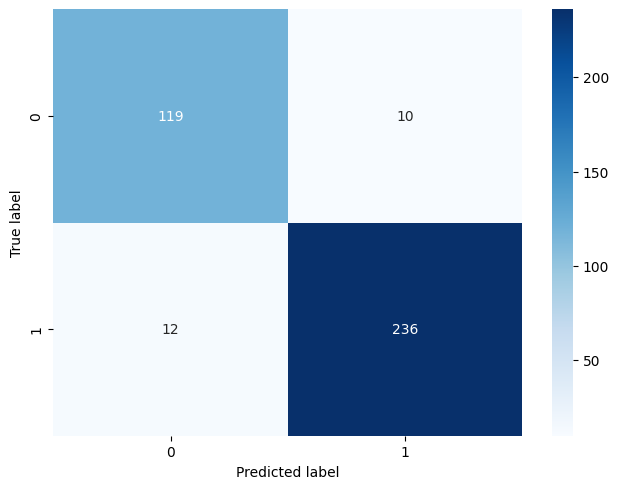

In [240]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def visualize(matrix):

  """
  This function takes in a matrix and generates a heatmap to visualize the data.

  Arguments:
  - matrix: a 2-dimensional matrix containing the data to be visualized.

  Returns:
  - None: The function does not return any value. It displays the heatmap plot directly.

  """
  con_mat_df = pd.DataFrame(matrix)
  sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

confusion_matrix = confusion_matrix(true_labels, predicted_labels)
visualize(confusion_matrix)

In [241]:
fold_accuracy

[0.8885941644562334,
 0.8806366047745358,
 0.8806366047745358,
 0.8806366047745358,
 0.9098143236074271,
 0.8859416445623343,
 0.9071618037135278,
 0.8938992042440318,
 0.9283819628647215,
 0.9177718832891246,
 0.8912466843501327,
 0.9416445623342176]

In [242]:
fold_f1

[0.9139344262295082,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9254385964912282,
 0.9145129224652087,
 0.9272349272349273,
 0.9134199134199134,
 0.9479768786127167,
 0.9333333333333335,
 0.9147609147609147,
 0.9554655870445343]